# ТЗ № 8: Системы массового обслуживания. БИ20-4, Чайковская, Петрова, Мытарева, Крылов, Иванова, Киракосян

Рассмотрим конкретный кейс из жизни: одним из тех мест, куда студенты Финансового университета, расположенного на Рязанском проспекте, ходят на обед является магазин «ВкусВилл». Необходимо определить, сколько касс потребуется, чтобы обслужить поток клиентов.

Количество касс в магазине: 5 шт.
Максимальная длина очереди, приемлемая для покупателя: 10 человек


In [130]:
import numpy as np
import math

N = [5, 15, 9] #количество посетителей утром, днем и вечером
prom = [10, 10, 10] #анализируемый временной промежуток

intense = [] 
for n in range(len(prom)):
   intense.append(N[n]/prom[n])
print('Интенсивность входного потока: ', intense)

t = np.array([2, 5, 3]) #время обслуживания одного клиента
intense1 = 1/t
print ('Интенсивность выходного потока: ', intense1) 
 
ro = [] #показатель нагруженности
for i in range(len(intense1)):
   ro.append(intense[i]/intense1[i])
print('Показатель нагруженности: ', ro)

n = 5 #количество касс
m = 10 #количество человек

Интенсивность входного потока:  [0.5, 1.5, 0.9]
Интенсивность выходного потока:  [0.5        0.2        0.33333333]
Показатель нагруженности:  [1.0, 7.5, 2.7]


In [141]:
vsp = [] 
for l in range(0,5):
   vsp.append(ro[0]**l/math.factorial(l))

vs_p = [] 
for l in range (5, 15):
   vs_p.append(ro[0]**l/(n**(l-n)*math.factorial(n)))

vspomog = vsp + vs_p
print('Вспомогательный массив утра: ', vspomog)

Вспомогательный массив утра:  [1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.0016666666666666668, 0.0003333333333333333, 6.666666666666667e-05, 1.3333333333333333e-05, 2.666666666666667e-06, 5.333333333333333e-07, 1.0666666666666667e-07, 2.1333333333333332e-08, 4.266666666666667e-09]


In [143]:
vsp1 = [] 
for l in range(0,5):
   vsp1.append(ro[1]**l/math.factorial(l))

vs_p1 = [] 
for l in range (5, 15):
   vs_p1.append(ro[1]**l/(n**(l-n)*math.factorial(n)))

vspomog1 = vsp1 + vs_p1
print('Вспомогательный массив дня: ', vspomog1)

Вспомогательный массив дня:  [1.0, 7.5, 28.125, 70.3125, 131.8359375, 197.75390625, 296.630859375, 444.9462890625, 667.41943359375, 1001.129150390625, 1501.6937255859375, 2252.5405883789062, 3378.8108825683594, 5068.216323852539, 7602.324485778809]


In [145]:
vsp2 = [] 
for l in range(0,5):
   vsp2.append(ro[2]**l/math.factorial(l))

vs_p2 = [] 
for l in range (5, 15):
   vs_p2.append(ro[2]**l/(n**(l-n)*math.factorial(n)))

vspomog2 = vsp2 + vs_p2
print('Вспомогательный массив вечера: ', vspomog2)

Вспомогательный массив дня:  [1.0, 2.7, 3.6450000000000005, 3.2805000000000004, 2.2143375000000005, 1.1957422500000006, 0.6457008150000002, 0.34867844010000015, 0.1882863576540001, 0.10167463313316005, 0.05490430189190644, 0.029648323021629477, 0.01601009443167992, 0.008645450993107156, 0.004668543536277866]


In [146]:
ver = []
v = (sum(vspomog)**-1)*100
ver.append(v)
for y in range (1, len(vspomog)):
    ver.append(vspomog[y]*v)
print('Вероятности по состоянию на утро: ', ver)

Вероятности по состоянию на утро:  [36.7816092098331, 36.7816092098331, 18.39080460491655, 6.13026820163885, 1.5325670504097124, 0.3065134100819425, 0.061302682016388506, 0.0122605364032777, 0.0024521072806555403, 0.000490421456131108, 9.808429122622161e-05, 1.961685824524432e-05, 3.923371649048864e-06, 7.846743298097727e-07, 1.5693486596195457e-07]


In [148]:
ver1 = []
v1 = (sum(vspomog1)**-1)*100
ver1.append(v1)
for y1 in range (1, len(vspomog)):
    ver1.append(vspomog1[y1]*v1)
print('Вероятности по состоянию на день: ', ver1)

Вероятности по состоянию на день:  [0.0044149644353195395, 0.03311223326489655, 0.12417087474336205, 0.31042718685840515, 0.5820509753595096, 0.8730764630392644, 1.3096146945588967, 1.964422041838345, 2.9466330627575172, 4.419949594136276, 6.629924391204414, 9.944886586806621, 14.917329880209932, 22.375994820314897, 33.563992230472344]


In [150]:
ver2 = []
v2 = (sum(vspomog2)**-1)*100
ver2.append(v2)
for y2 in range (1, len(vspomog2)):
    ver2.append(vspomog2[y2]*v2)
print('Вероятности по состоянию на вечер: ', ver2) 

Вероятности по состоянию на вечер:  [6.479287104821767, 17.494075183018772, 23.617001497075343, 21.25530134736781, 14.347328409473272, 7.747557341115568, 4.183680964202407, 2.2591877206692996, 1.219961369161422, 0.6587791393471679, 0.35574073524747074, 0.19209999703363417, 0.10373399839816247, 0.056016359135007736, 0.030248833932904184]


Состояние системы утром


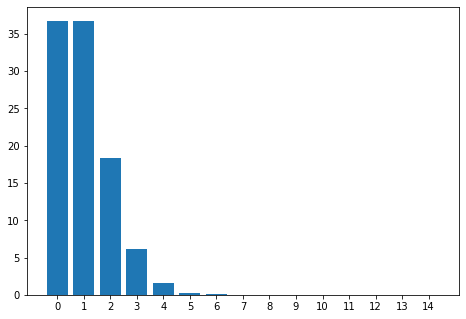

In [147]:
print ('Состояние системы утром')
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
ax.bar(langs, ver)
plt.show()

Состояние системы днем


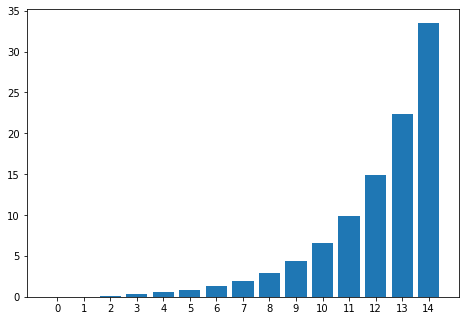

In [149]:
print ('Состояние системы днем')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
ax.bar(langs, ver1)
plt.show()

Состояние системы вечером


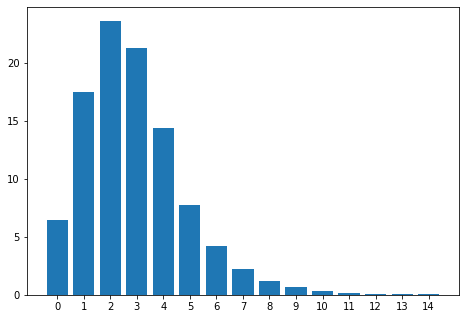

In [151]:
print ('Состояние системы вечером')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
ax.bar(langs, ver2)
plt.show()

## Характеристики для клиента

In [161]:
print ('Вероятность отказа в обслуживании утром: ', ver[14])
print ('Вероятность отказа в обслуживании днем: ', ver1[14])
print ('Вероятность отказа в обслуживании вечером: ', ver2[14])

Характеристики для клиента
Вероятность отказа в обслуживании утром:  1.5693486596195457e-07
Вероятность отказа в обслуживании днем:  33.563992230472344
Вероятность отказа в обслуживании вечером:  0.030248833932904184


In [208]:
print ('Вероятность встать в очередь утром: ', sum(ver[5:14]))
print ('Вероятность встать в очередь днем: ', sum(ver1[5:14]))
print ('Вероятность встать в очередь вечером: ', sum(ver2[5:14]))

Вероятность встать в очередь утром:  0.3831415664338456
Вероятность встать в очередь днем:  65.38183153486617
Вероятность встать в очередь вечером:  16.776757624310136


## Характеристики для владельца

In [206]:
print('Абсолютная пропускная способность утром: ', intense[0]*(1-ver[14]))
print('Абсолютная пропускная способность днем: ', intense[1]*(1-ver1[14]/100))
print('Абсолютная пропускная способность вечером: ', intense[2]*(1-ver2[14]))

Абсолютная пропускная способность утром:  0.499999921532567
Абсолютная пропускная способность днем:  0.9965401165429147
Абсолютная пропускная способность вечером:  0.8727760494603862


In [207]:
print('Относительная пропускная способность утром: ', 1-ver[14])
print('Относительная пропускная способность днем: ', 1-ver1[14])
print('Относительная пропускная способность вечером: ', 1-ver2[14])

Относительная пропускная способность утром:  0.999999843065134
Относительная пропускная способность днем:  -32.563992230472344
Относительная пропускная способность вечером:  0.9697511660670958


In [211]:
print('Среднее колчество занятых касс утром: ', intense[0]*(1-ver[14])/intense1[0])
print('Среднее количество занятых касс днем: ', intense[1]*(1-ver1[14]/100)/intense1[1])
print('Среднее количество занятых касс вечером: ', intense[2]*(1-ver2[14])/intense1[2])

Среднее колчество занятых касс утром:  0.999999843065134
Среднее количество занятых касс днем:  4.982700582714574
Среднее количество занятых касс вечером:  2.618328148381159


In [219]:
print('Коэффициент простоя утром: ', (1-(intense[0]*(1-ver[14])/intense1[0])/n)*100)
print('Коэффициент простоя днем: ', (1-(intense[1]*(1-ver1[14]/100)/intense1[1])/n)*100)
print('Коэффициент простоя вечером: ', (1-(intense[2]*(1-ver2[14])/intense1[2])/n)*100)

Коэффициент простоя утром:  80.00000313869732
Коэффициент простоя днем:  0.34598834570852555
Коэффициент простоя вечером:  47.633437032376825
